# Exploratory analysis in python:
## category and continuous variables

The purpose of this program is to present code in python that makes beautiful and useful graphs for exploratory analysis in supervised learning with two categories in target.
It will be applied to Porto Seguro data from Kaggle.

### import

In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.style.use('ggplot')


In [2]:
import os
#os.getcwd()
%cd "C:/Users/rhais/Documents/Rhaissa/Estudos/Kaggle/Kaggle-Competitions/Porto Seguro/train"
data = pd.read_csv('train.csv',na_values=-1)
#C:\Users\rhais\Documents\Rhaissa\Estudos\Kaggle\Kaggle-Competitions\Porto Seguro\train

C:\Users\rhais\Documents\Rhaissa\Estudos\Kaggle\Kaggle-Competitions\Porto Seguro\train


In [3]:
X_all = data.iloc[:,2:]
y_all = data.target

##  example with *continuous* variables using Porto Seguro data 


### split in goups with same size to visualize the target rate in each one

In [136]:
#var = 'ps_reg_03'
def groups (n_groups, var, y_resp):
    ser = pd.qcut(var, n_groups, retbins = False)
    train = pd.DataFrame(pd.crosstab(ser, y_resp))
    train.columns = ['N_0', 'N_1']
    train['total'] = train.N_0 + train.N_1
    train['P_1'] = np.round(train['N_1'] / train['total'],2)
    train['P_total'] = np.round((train['total'] / sum(train.total) ), 2)
   # train['index2'] = train.index.categories.astype(str)
    
    return (train)

def plots_groups_num (table, figsize_1 = 14, figsize_2 = 6, bar_width = 0.91, fontsize_inside= 13, fontsize_axis = 13):

    
    fig = plt.figure(figsize=(figsize_1, figsize_2))
    ax = fig.add_subplot(1, 1, 1)
    #plot
    A = table.P_1
    B = 1- table.P_1
    bar_l = range(len(table.index))
    ax1 = ax.bar(bar_l, A, width=bar_width,label="A", color="#e87109" )
    ax2 = ax.bar(bar_l, B, bottom = A,width=bar_width,label="B", color="#3842f7")

    # visual elements
    ax.set_xlabel("Groups", fontsize=18)
    ax.legend(['Prob_1','Prob_0'],bbox_to_anchor=(1, 0.9),fontsize=fontsize_axis)
    plt.yticks(fontsize=fontsize_axis)
    plt.xticks(fontsize=fontsize_axis)
    plt.title(table.index.name,fontsize=18)
    ax.set_ylim(0,1.13)
    i = 0

    #plotting texts inside bars
    for r1, r2 in zip(ax1, ax2):
        h1 = np.round(r1.get_height(),decimals=2)
        h2 = np.round(r2.get_height(),decimals=2)
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., h1, ha="center", va="center", color="white", fontsize=fontsize_inside, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 /2., h2, ha="center", va="center", color="white", fontsize=fontsize_inside, fontweight="bold")
        plt.text(r1.get_x() + r1.get_width() / 2, h1+h2 +0.05, '{:.0%}'.format(np.round(table.P_total[i],2)), ha="center", va="center", color="gray", fontsize=13)
        i += 1

plt.show()

       

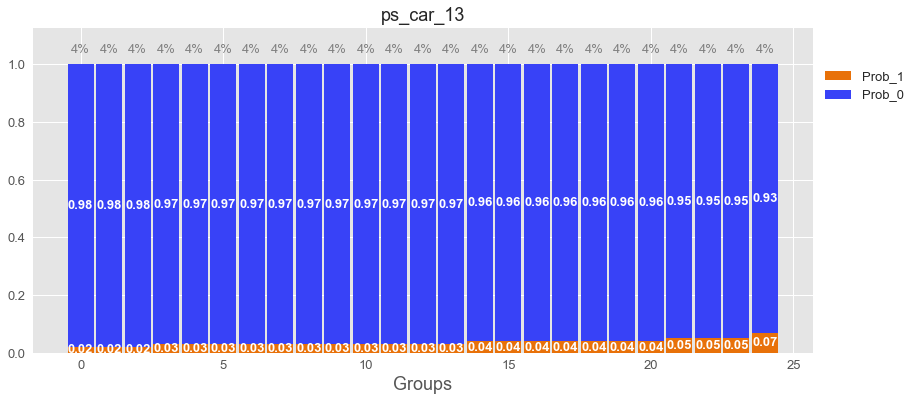

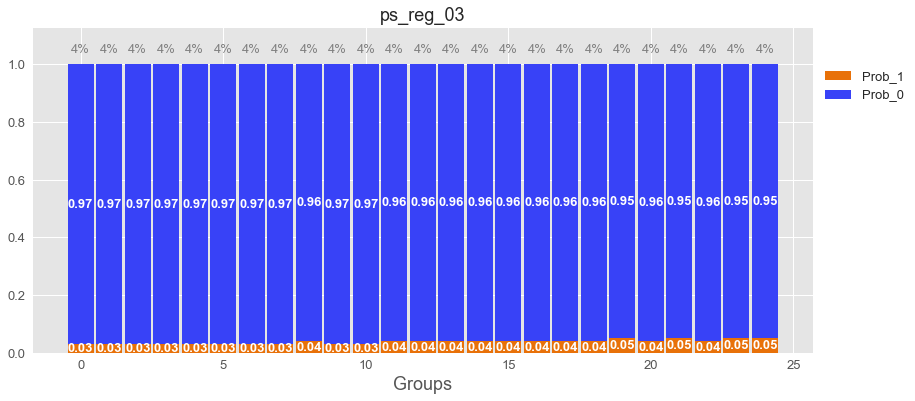

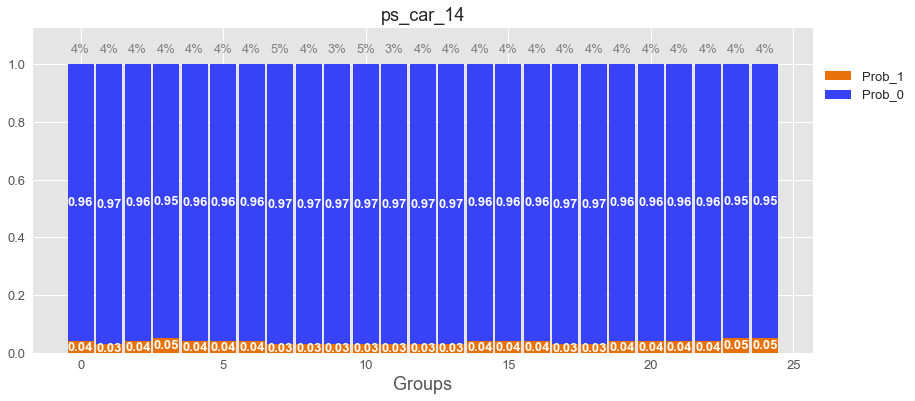

In [147]:
list_vars2 = ['ps_car_13', 'ps_reg_03', 'ps_car_14']
list_vars1 = ['ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']
for var in list_vars2:
    table = groups (25, X_all[var], y_all)
    plots_groups_num (table)


### correlation plot

In [174]:
def corr_heatmap (data, figsize_1= 10, figsize_2 = 10, see_numbers= False):
    fig, plot = plt.subplots(figsize=(figsize_1, figsize_2)) 
    plot = sns.heatmap(pd.DataFrame.corr(data), linewidths=0.3, annot = see_numbers)
    return plot

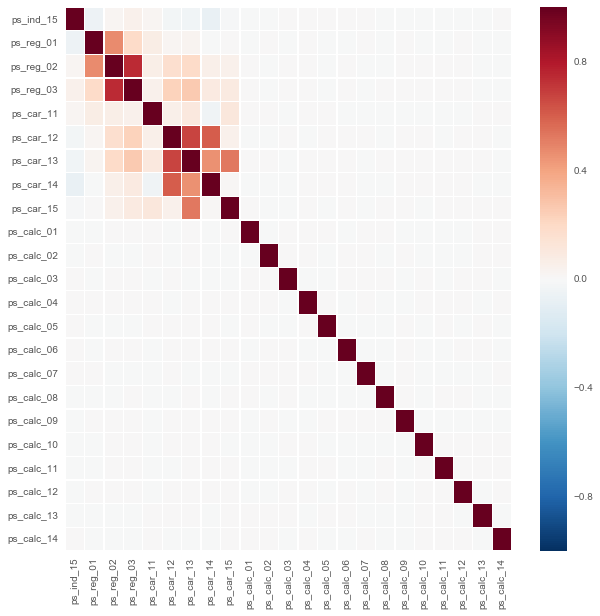

In [175]:
corr_heatmap(X_all[list_vars1])

##  example with *category* variables using Porto Seguro data 

In [138]:
x_cols = np.array(X_all.columns)
names_cat = filter(lambda x: x.endswith('_cat'), x_cols)
for var in names_cat:
    X_all.loc[:, var] = X_all.loc[:,var].fillna(999)

In [139]:
#use this function if it is necessary
def addMiss(element):
    if element == 999:
        return 'missing'
    else:
        return element

def plots_groups_cat (data, names_var_array, y_resp, y_rate, figsize_1 = 14, figsize_2 = 6, rotation = 0, width = 0.35 ):
    i = 1
    for var in names_var_array:
        table = pd.crosstab(data[var], y_resp)
        sum_line = table.apply(lambda x:x.sum(),axis = 1)
        p_target = table.iloc[:,1]/sum_line
        p_total = sum_line / sum((sum(table.iloc[:,0]), sum(table.iloc[:,1])))
        df = pd.concat([p_total, p_target ], axis=1)
        df.columns = ['% cat', '% target']
        df.index = map(addMiss,  df.index)

        df['index2'] = df.index
        df['index2'] = df.index2.astype(str)

        #print(df)
        df.set_index('index2', inplace=True)
        if i % 2 != 0:
            fig = plt.figure(figsize = (figsize_1, figsize_2))
            j = 1
        else:
            j = 2
        
        #plot
        ax1 = fig.add_subplot(1,2,j)
        df.iloc[:,0].plot(kind = 'bar', width = width, color = 'turquoise', ax=ax1, title = var)
        ax2 = ax1.twinx()
        df['% target'].plot(color = 'blue', ax = ax2, marker = 'o')

        # visual elements
        spacing = 0.5
        
        ax1.set_xticklabels(np.array(df.index), rotation = rotation)
        ax1.set_xlabel('')
        ax1.set_ylabel('% category')
        ax1.set_ylim(0,1.05)
        ax1.yaxis.label.set_size(12)
        
        ax2.set_xlim(-spacing, len(df['% cat']) - spacing)
        ax2.set_ylabel('% target')
        ax2.set_ylim(0,0.10)
        ax2.yaxis.label.set_size(12)         
        ax2.grid(False)
        
        plt.axhline(y= y_rate, color='gray', linestyle='--')

        plt.subplots_adjust(wspace=0.3, hspace=0.3)
        
        if i % 2 == 0:
            plt.show()
        i=i+1

    

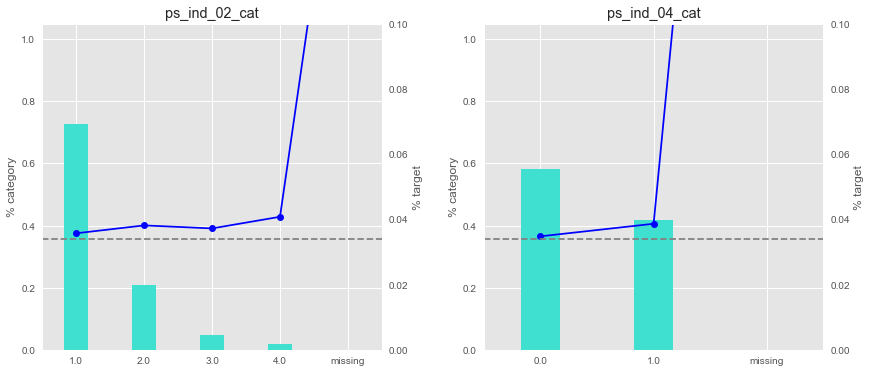

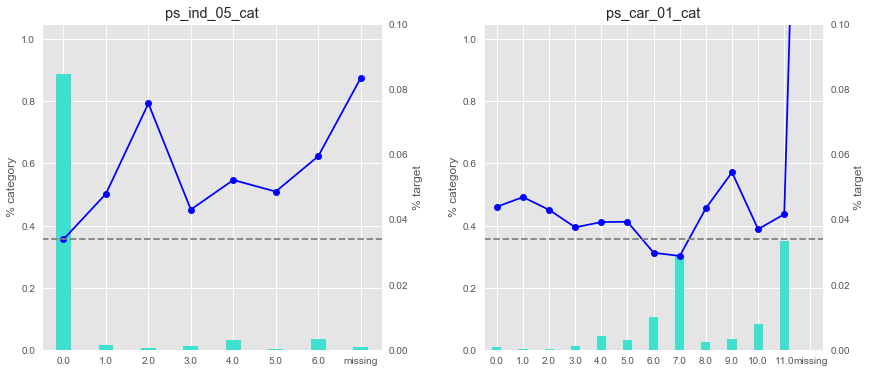

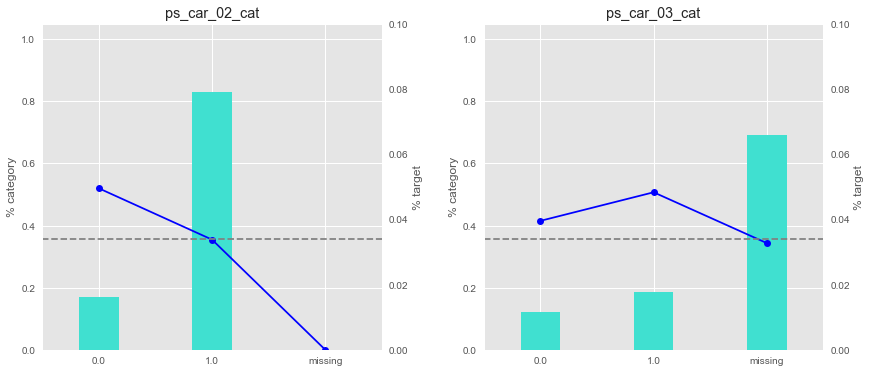

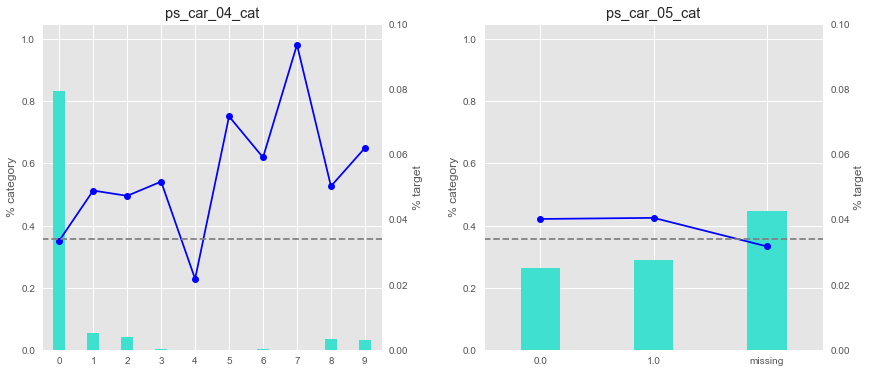

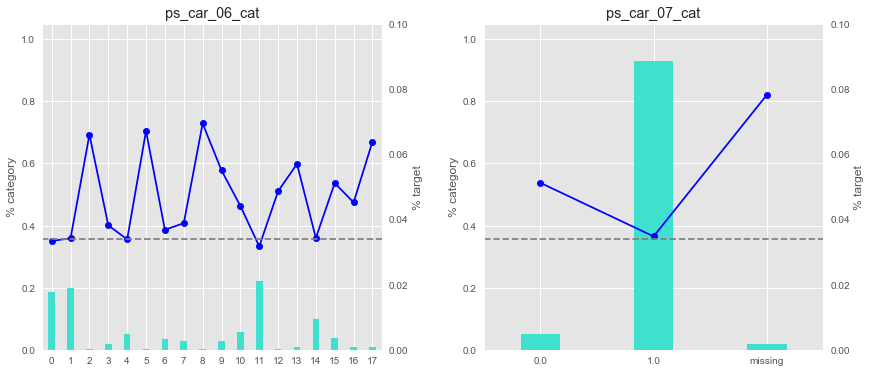

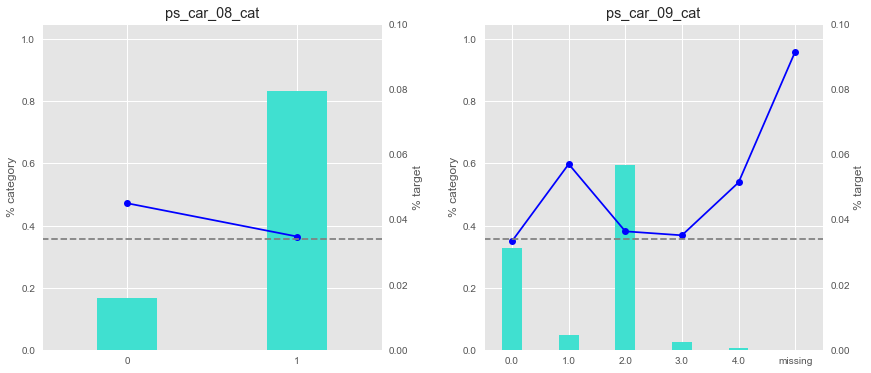

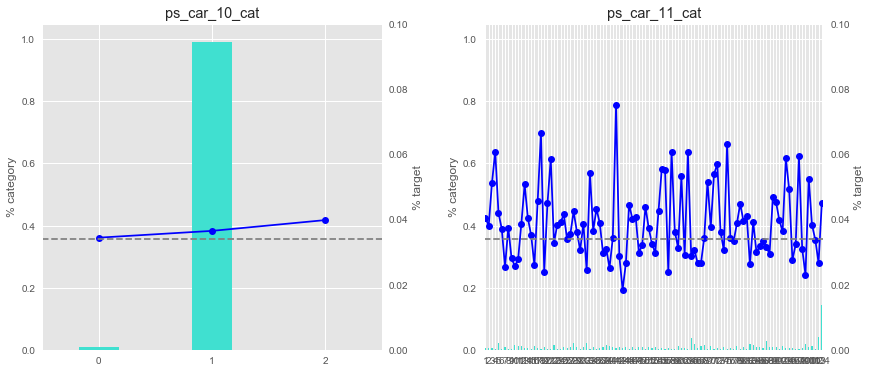

In [140]:
plots_groups_cat(X_all, names_cat, y_all, 0.034)